# **Extract, Transform and Load**

It involves extracting data from multiple sources, transforming it into a usable format, and loading it into a target database or data warehouse.

# **Dataset:**

**FEV (Forced Expiratory Volume)**

FEV is a measurement of how much air a person can obtrusively exhale in a single second. It is a typical pulmonary function test that is used to evaluate lung health and identify a few different respiratory disorders.

A spirometer, a tool that monitors how much air a person exhales during a forced expiration, is often used to measure it. A deep breath is taken before the test subject exhales into the spirometer as strongly and completely as they can. FEV is a crucial marker of lung health that can be used to monitor changes in lung function over time.

1. A drop in FEV can be an indication of a respiratory condition.

2. A rise in FEV could mean that medication or a change in lifestyle have improved lung function.


# **Objectives:**

1. In this assignment we will learn about the ETL project serves as an illustration on how to modify data in your database systems and verify its integrity.

2. The measurements of lung function were performed on 654 kids who had been to a specific clinic for a normal checkup.

3. The children participating in this study were asked whether they were current smokers.

4. Available data includes measurement of age, height, sex, FEV, and
whether each child smokes or not.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [41]:
spark = SparkSession.builder.master("local[2]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark

In [5]:
from pyspark import SparkContext
from pyspark import SparkConf

In [6]:
sc = spark.sparkContext

**UNSTRUCTURED DATA**

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import col, split

In [8]:
def extract_data(start, end , path):
    with open(path) as f:
        for line in f:
            if line.startswith(start):
                result = []
                result.append(line.strip())
                for line in f:
                    if line.rstrip() == end:
                        break
                    result.append(line.strip())
    f.close()
    return(result)

In [9]:
path = '/content/FEVdata.txt'
getList = extract_data(" ", " " , path)
getList

['1,301,9,1.708,57.0,2,2',
 '2,451,8,1.724,67.5,2,2',
 '3,501,7,1.720,54.5,2,2',
 '4,642,9,1.558,53.0,1,2',
 '5,901,9,1.895,57.0,1,2',
 '6,1701,8,2.336,61.0,2,2',
 '7,1752,6,1.919,58.0,2,2',
 '8,1753,6,1.415,56.0,2,2',
 '9,1901,8,1.987,58.5,2,2',
 '10,1951,9,1.942,60.0,2,2',
 '11,1952,6,1.602,53.0,2,2',
 '12,2001,8,1.735,54.0,1,2',
 '13,2101,8,2.193,58.5,2,2',
 '14,2401,8,2.118,60.5,1,2',
 '15,3102,8,2.258,58.0,1,2',
 '16,3142,7,1.932,53.0,1,2',
 '17,3541,5,1.472,50.0,1,2',
 '18,3551,6,1.878,53.0,2,2',
 '19,4201,9,2.352,59.0,1,2',
 '20,4301,9,2.604,61.5,1,2',
 '21,4351,5,1.400,49.0,2,2',
 '22,5151,5,1.256,52.5,2,2',
 '23,5152,4,0.839,48.0,2,2',
 '24,5201,7,2.578,62.5,1,2',
 '25,5601,9,2.988,65.0,2,2',
 '26,5642,3,1.404,51.5,1,2',
 '27,5702,9,2.348,60.0,1,2',
 '28,6042,5,1.755,52.0,1,2',
 '29,6101,8,2.980,60.0,2,2',
 '30,6801,9,2.100,60.0,2,2',
 '31,6851,5,1.282,49.0,2,2',
 '32,7201,9,3.000,65.5,1,2',
 '33,7251,8,2.673,60.0,2,2',
 '34,7252,7,2.093,57.5,2,2',
 '35,7253,5,1.612,52.0,2,2',

In [10]:
from pyspark.sql.types import StringType
data = spark.createDataFrame(getList,StringType())
data.cache()

value
"1,301,9,1.708,57...."
"2,451,8,1.724,67...."
"3,501,7,1.720,54...."
"4,642,9,1.558,53...."
"5,901,9,1.895,57...."
"6,1701,8,2.336,61..."
"7,1752,6,1.919,58..."
"8,1753,6,1.415,56..."
"9,1901,8,1.987,58..."
"10,1951,9,1.942,6..."


In [11]:
cleaned = data.select(split(col("value"), ",").getItem(0).alias("Case Number"),
                     split(col("value"), ",").getItem(1).alias("Subject ID"),
                     split(col("value"), ",").getItem(2).alias("Age"),
                     split(col("value"), ",").getItem(3).alias("FEV"),
                     split(col("value"), ",").getItem(4).alias("Height"),
                     split(col("value"), ",").getItem(5).alias("Sex"),
                     split(col("value"), ",").getItem(6).alias("Smoke")).drop("value")

In [12]:
cleaned.show(truncate=False)

+-----------+----------+---+-----+------+---+-----+
|Case Number|Subject ID|Age|FEV  |Height|Sex|Smoke|
+-----------+----------+---+-----+------+---+-----+
|1          |301       |9  |1.708|57.0  |2  |2    |
|2          |451       |8  |1.724|67.5  |2  |2    |
|3          |501       |7  |1.720|54.5  |2  |2    |
|4          |642       |9  |1.558|53.0  |1  |2    |
|5          |901       |9  |1.895|57.0  |1  |2    |
|6          |1701      |8  |2.336|61.0  |2  |2    |
|7          |1752      |6  |1.919|58.0  |2  |2    |
|8          |1753      |6  |1.415|56.0  |2  |2    |
|9          |1901      |8  |1.987|58.5  |2  |2    |
|10         |1951      |9  |1.942|60.0  |2  |2    |
|11         |1952      |6  |1.602|53.0  |2  |2    |
|12         |2001      |8  |1.735|54.0  |1  |2    |
|13         |2101      |8  |2.193|58.5  |2  |2    |
|14         |2401      |8  |2.118|60.5  |1  |2    |
|15         |3102      |8  |2.258|58.0  |1  |2    |
|16         |3142      |7  |1.932|53.0  |1  |2    |
|17         

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=cleaned.show

In [15]:
df = pd.read_csv('/content/FEVdata.txt')

In [16]:
column_headers = df.columns.tolist()

In [17]:
print(df.shape)

(653, 7)


In [18]:
print(df.head())

       1   301  9  1.708  57.0    2  2.1
0      2   451  8  1.724  67.5  2.0  2.0
1      3   501  7  1.720  54.5  2.0  2.0
2      4   642  9  1.558  53.0  1.0  2.0
3      5   901  9  1.895  57.0  1.0  2.0
4      6  1701  8  2.336  61.0  2.0  2.0


In [19]:
print(df.columns)

Index(['    1', '301', '9', '1.708', '57.0', '2', '2.1'], dtype='object')


In [20]:
print(df.dtypes)

    1     object
301       object
9         object
1.708    float64
57.0     float64
2        float64
2.1      float64
dtype: object


In [21]:
print(df.describe())

            1.708        57.0           2    2.1
count  653.000000  476.000000  176.000000  176.0
mean     1.707420   22.299370    1.465909    2.0
std      0.540563   26.751432    0.500260    0.0
min      0.791000    1.000000    1.000000    2.0
25%      1.000000    2.000000    1.000000    2.0
50%      2.000000    2.000000    1.000000    2.0
75%      2.000000   54.500000    2.000000    2.0
max      3.842000   69.000000    2.000000    2.0


In [22]:
print(df.isnull().sum())

    1      0
301        0
9          0
1.708      0
57.0     177
2        477
2.1      477
dtype: int64


In [23]:
columns = ['FEV', 'Sex', 'Smoke']

Text(0.5, 1.0, 'FEV Rating by Sex')

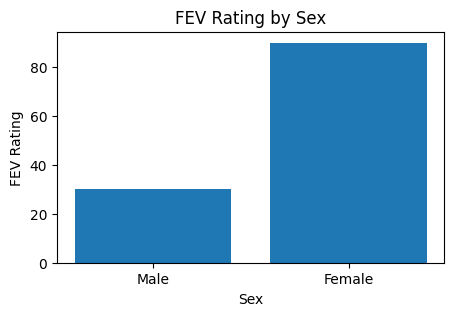

In [25]:
sex = ['Male', 'Female']
smoke = [True, False]
fev_rating = [30,90]

plt.figure(figsize=(5, 3))

plt.bar(sex, fev_rating)
plt.xlabel('Sex')
plt.ylabel('FEV Rating')
plt.title('FEV Rating by Sex')

# **Scalability**

In [28]:
import time 
start_time = time.time()

In [44]:
# Determine the degree of parallelism
spark.sparkContext.defaultParallelism

2

In [43]:
from datetime import datetime
from pyspark.sql import SparkSession

start_time = datetime.now()

spark = SparkSession.builder.appName("FEV Dataset").getOrCreate()

df = spark.read.option("header", "true").csv('/content/FEVdata.txt')

df.show()

end_time = datetime.now()

processing_time = end_time - start_time
print("Processing time: {}".format(processing_time))

+-----+----+---+-----+----+---+---+
|    1| 301|  9|1.708|57.0| 25| 26|
+-----+----+---+-----+----+---+---+
|    2| 451|  8|1.724|67.5|  2|  2|
|    3| 501|  7|1.720|54.5|  2|  2|
|    4| 642|  9|1.558|53.0|  1|  2|
|    5| 901|  9|1.895|57.0|  1|  2|
|    6|1701|  8|2.336|61.0|  2|  2|
|    7|1752|  6|1.919|58.0|  2|  2|
|    8|1753|  6|1.415|56.0|  2|  2|
|    9|1901|  8|1.987|58.5|  2|  2|
|   10|1951|  9|1.942|60.0|  2|  2|
|   11|1952|  6|1.602|53.0|  2|  2|
|   12|2001|  8|1.735|54.0|  1|  2|
|   13|2101|  8|2.193|58.5|  2|  2|
|   14|2401|  8|2.118|60.5|  1|  2|
|   15|3102|  8|2.258|58.0|  1|  2|
|   16|3142|  7|1.932|53.0|  1|  2|
|   17|3541|  5|1.472|50.0|  1|  2|
|   18|3551|  6|1.878|53.0|  2|  2|
|   19|4201|  9|2.352|59.0|  1|  2|
|   20|4301|  9|2.604|61.5|  1|  2|
|   21|4351|  5|1.400|49.0|  2|  2|
+-----+----+---+-----+----+---+---+
only showing top 20 rows

Processing time: 0:00:01.039083
